<a href="https://colab.research.google.com/github/Christinastalin/DataScience-/blob/main/Email_Spam_Classifier_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [73]:
import numpy as np
import pandas as pd

In [74]:
df= pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin-1')

In [75]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [76]:
df.shape

(5572, 5)

In [77]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [79]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [80]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [81]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [82]:
df.target = le.fit_transform(df.target)

In [83]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
df.isnull().sum()

,0
target,0
text,0


In [85]:
df.duplicated().sum()

np.int64(403)

In [86]:
df.drop_duplicates(inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df['target'].value_counts()

,count
target,
0,4516
1,653


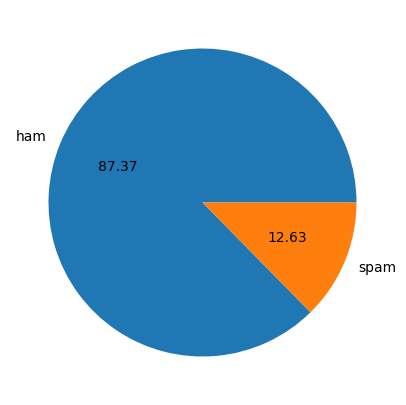

In [90]:
plt.figure(figsize=(7,5))
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [91]:
#Data is imbalanced

In [92]:
import nltk

In [93]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [94]:
df['text_token']=df.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [95]:
df['nof_char']=df.text.apply(len)

In [96]:
df.head()

,target,text,text_token,nof_char
0,0,"Go until jurong point, crazy.. Available only ...",24,111
1,0,Ok lar... Joking wif u oni...,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155
3,0,U dun say so early hor... U c already then say...,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61


In [97]:
df['nof_sent']=df.text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [98]:
df.head()

,target,text,text_token,nof_char,nof_sent
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [99]:
df[['text_token','nof_char','nof_sent']].where(df['target']==0).describe()

,text_token,nof_char,nof_sent
count,4516.000000,4516.000000,4516.000000
mean,17.123782,70.459256,1.820195
std,13.493970,56.358207,1.383657
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,38.000000


In [100]:
df[['text_token','nof_char','nof_sent']].where(df['target']==1).describe()

,text_token,nof_char,nof_sent
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.970904
std,7.008418,30.137753,1.488425
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


In [101]:
import seaborn as sns

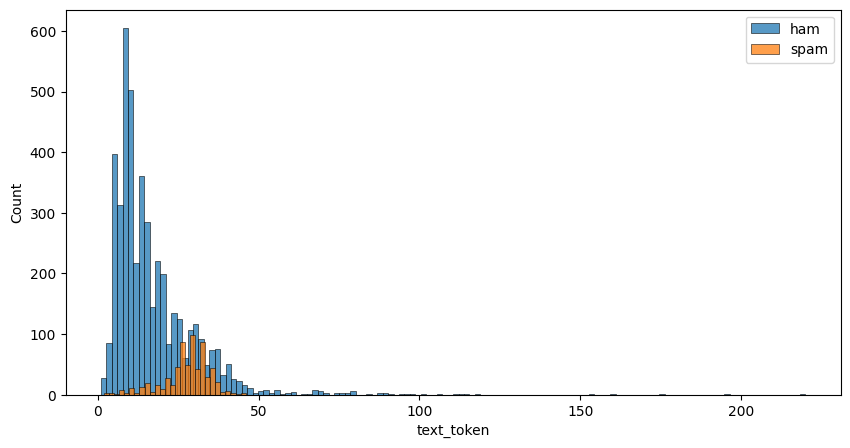

In [102]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['text_token'])
sns.histplot(df[df['target'] == 1]['text_token'])
plt.legend(['ham','spam'])
plt.show()

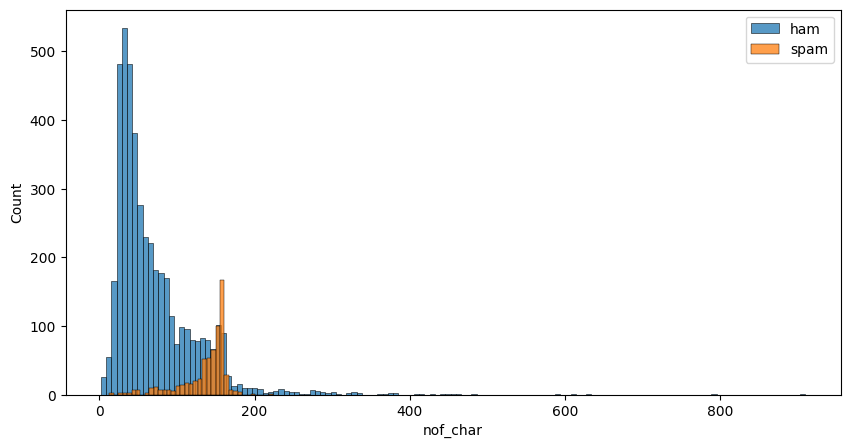

In [103]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['nof_char'])
sns.histplot(df[df['target'] == 1]['nof_char'])
plt.legend(['ham','spam'])
plt.show()

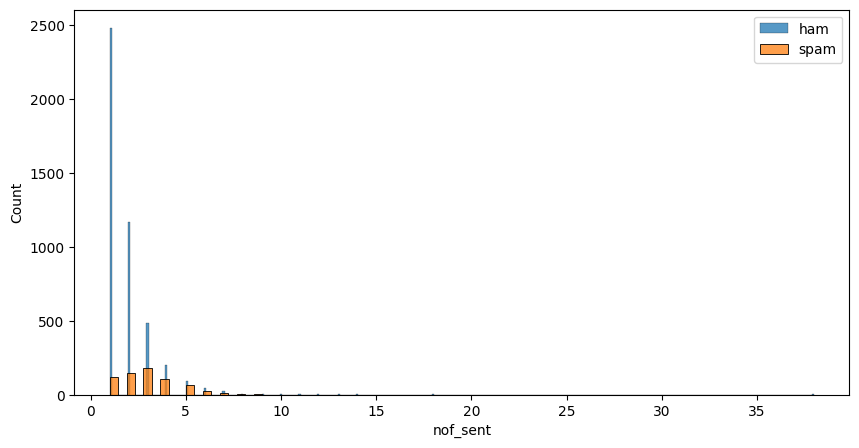

In [104]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['nof_sent'])
sns.histplot(df[df['target'] == 1]['nof_sent'])
plt.legend(['ham','spam'])
plt.show()

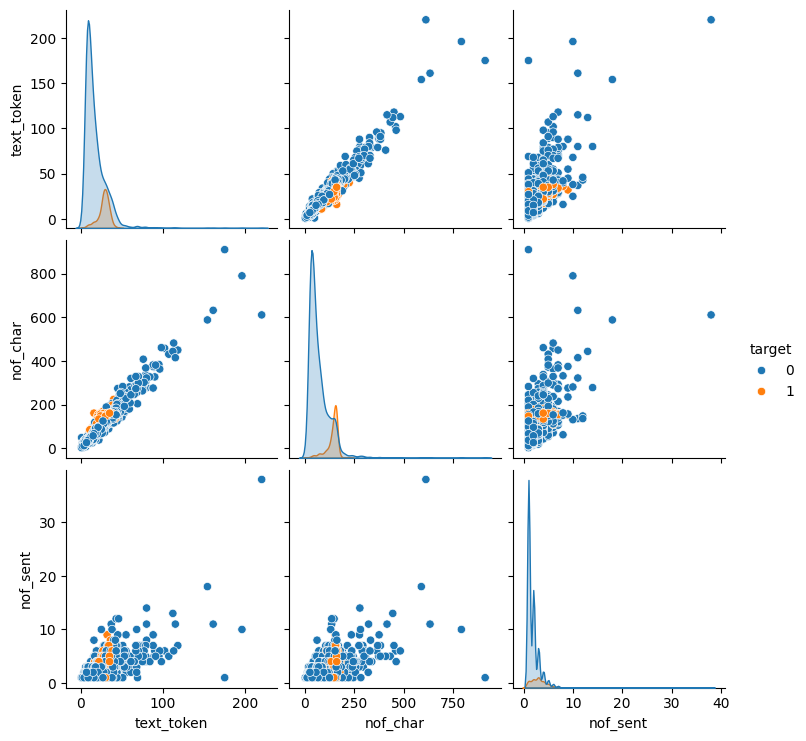

In [105]:
sns.pairplot(df,hue='target')

<Axes: >

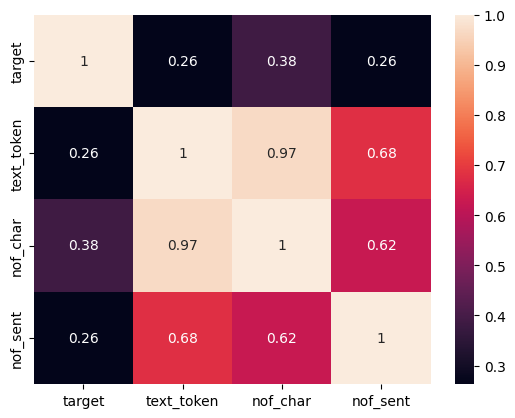

In [106]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

##Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [107]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [108]:
import string

In [109]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



In [110]:
df.columns

Index(['target', 'text', 'text_token', 'nof_char', 'nof_sent'], dtype='object')

In [111]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [112]:
df['transformed_text'] = df['text'].apply(transform_text)

In [113]:
df.head()

,target,text,text_token,nof_char,nof_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


In [114]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height = 500, min_font_size = 10 , background_color = 'white')

In [115]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep= " "))

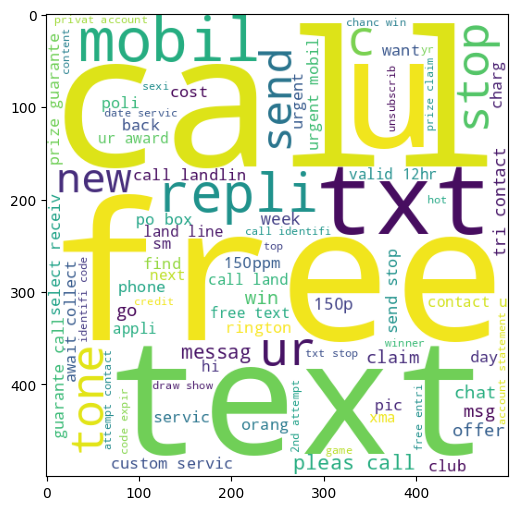

In [116]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [117]:
ham_wc = wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep= " "))

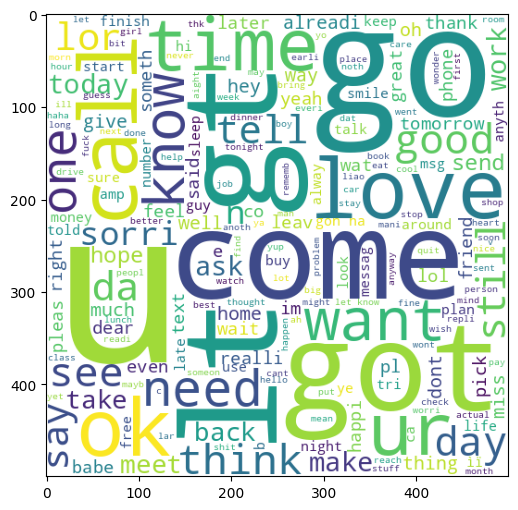

In [118]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [119]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [120]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [121]:
len(spam_corpus)

9939

In [122]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


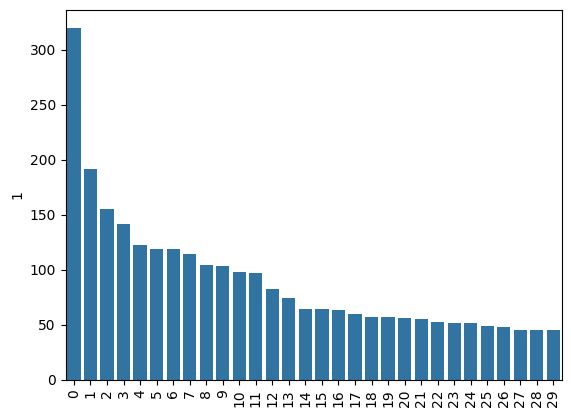

In [123]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [124]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [125]:
len(ham_corpus)

35404

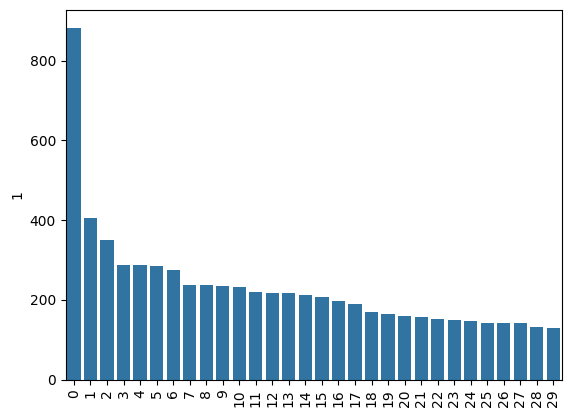

In [126]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [127]:
df.head()

,target,text,text_token,nof_char,nof_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


## Model Building

In [128]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [129]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [130]:
X.shape

(5169, 6708)

In [131]:
y= df['target'].values

In [132]:
y.shape

(5169,)

In [133]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [138]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [139]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [140]:
gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [141]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [142]:
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred3))
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [143]:
X2 = tfidf.fit_transform(df['transformed_text']).toarray()

In [144]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, y, test_size=0.2, random_state=2)

In [145]:
gnb.fit(X2_train, Y_train)
y_pred4 = gnb.predict(X2_test)
print(accuracy_score(Y_test, y_pred4))
print(confusion_matrix(Y_test, y_pred4))
print(precision_score(Y_test,y_pred4))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [146]:
mnb.fit(X2_train, Y_train)
y_pred5 = mnb.predict(X2_test)
print(accuracy_score(Y_test, y_pred5))
print(confusion_matrix(Y_test, y_pred5))
print(precision_score(Y_test,y_pred5))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [147]:
bnb.fit(X2_train, Y_train)
y_pred6 = bnb.predict(X2_test)
print(accuracy_score(Y_test, y_pred6))
print(confusion_matrix(Y_test, y_pred6))
print(precision_score(Y_test,y_pred6))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### Here, we see that using tfidf vectorization in Multinomial classification model we can achieve 100% precision, i.e. the model didn't predict any false positive


In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [153]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [154]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [155]:
def train_classifier(clf,X2_train,Y_train,X2_test,Y_test):
    clf.fit(X2_train,Y_train)
    y_pred = clf.predict(X2_test)
    accuracy = accuracy_score(Y2_test,y_pred)
    precision = precision_score(Y2_test,y_pred)

    return accuracy,precision

In [156]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X2_train,Y2_train,X2_test,Y2_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [157]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [158]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.965184,0.939655
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [159]:
import pickle

In [160]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))